In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = '../data/train'
valid_dir = '../data/validation'

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(100, 100, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16,(3,3),input_shape=(100, 100, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [4]:
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9),
             metrics=['acc'])

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(100, 100),
                                                    batch_size=10,
                                                    class_mode='binary')

Found 824 images belonging to 2 classes.


In [6]:
val_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = val_datagen.flow_from_directory(valid_dir,
                                                        target_size=(100, 100),
                                                        batch_size=10,
                                                        class_mode='binary')

Found 274 images belonging to 2 classes.


In [7]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

Epoch 1/10
83/83 [==============================] - 6s 70ms/step - loss: 0.6316 - acc: 0.6687 - val_loss: 0.3989 - val_acc: 0.9234
Epoch 2/10
83/83 [==============================] - 6s 68ms/step - loss: 0.3356 - acc: 0.9138 - val_loss: 0.1730 - val_acc: 0.9818
Epoch 3/10
83/83 [==============================] - 6s 67ms/step - loss: 0.2979 - acc: 0.8932 - val_loss: 0.6109 - val_acc: 0.6825
Epoch 4/10
83/83 [==============================] - 6s 66ms/step - loss: 0.3181 - acc: 0.8968 - val_loss: 0.2474 - val_acc: 0.9197
Epoch 5/10
83/83 [==============================] - 6s 68ms/step - loss: 0.1948 - acc: 0.9454 - val_loss: 0.1804 - val_acc: 0.9526
Epoch 6/10
83/83 [==============================] - 6s 66ms/step - loss: 0.1341 - acc: 0.9636 - val_loss: 0.1304 - val_acc: 0.9708
Epoch 7/10
83/83 [==============================] - 6s 67ms/step - loss: 0.1328 - acc: 0.9563 - val_loss: 0.1845 - val_acc: 0.9416
Epoch 8/10
83/83 [==============================] - 6s 76ms/step - loss: 0.2286 - a

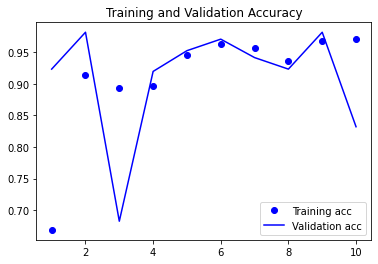

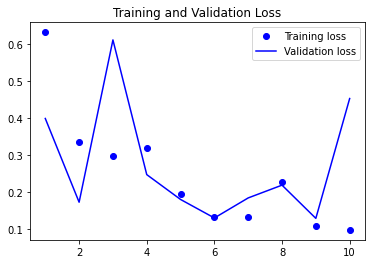

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

## Checkpointing

Note: Kernel restarted here and the .fit() method is called without calling above. That is only the model and data preperation cells were run before running the cells below.

In [7]:
model.save_weights('model_v1.h5', save_format='h5')


In [8]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'best_model_{epoch:02d}_{val_acc:.3f}.h5',
    save_best_only=True,
    monitor='val_acc',
    mode='max'
)

In [9]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[checkpoint]  
    )

Epoch 1/10
83/83 [==============================] - 6s 68ms/step - loss: 0.4532 - acc: 0.7743 - val_loss: 0.2299 - val_acc: 0.9088
Epoch 2/10
83/83 [==============================] - 5s 66ms/step - loss: 0.2539 - acc: 0.9126 - val_loss: 0.1207 - val_acc: 0.9635
Epoch 3/10
83/83 [==============================] - 5s 66ms/step - loss: 0.1050 - acc: 0.9648 - val_loss: 0.2096 - val_acc: 0.8905
Epoch 4/10
83/83 [==============================] - 5s 65ms/step - loss: 0.1537 - acc: 0.9454 - val_loss: 0.1559 - val_acc: 0.9562
Epoch 5/10
83/83 [==============================] - 5s 65ms/step - loss: 0.0834 - acc: 0.9672 - val_loss: 0.1310 - val_acc: 0.9745
Epoch 6/10
83/83 [==============================] - 6s 68ms/step - loss: 0.0716 - acc: 0.9697 - val_loss: 0.0868 - val_acc: 0.9854
Epoch 7/10
83/83 [==============================] - 6s 66ms/step - loss: 0.5002 - acc: 0.7791 - val_loss: 0.3479 - val_acc: 0.9270
Epoch 8/10
83/83 [==============================] - 5s 65ms/step - loss: 0.3570 - a